In [18]:
from google.colab import drive
drive.mount('/content/drive')
!pip install prophet


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Methodolgy**

# Steps and Explanations

## Data Loading and Preprocessing
1. Load the rainfall data from the provided CSV file.
2. Replace any -999 values (missing or outlier data) with NaN to handle them later.
3. Convert the individual YEAR, MO, and DY columns into a single datetime format called 'Date'.
4. Rename the columns to 'date' and 'precipitation' to match the ARIMA model's requirements.
5. Set the 'date' column as the index of the DataFrame.
6. Resample the data to a weekly frequency by summing the values for each week.
7. Fill missing values with 0.

## Forecasting
1. Define the start and end dates for the forecast period beyond the existing data (up to 2028).
2. Calculate the number of forecast periods (weeks) based on the start and end dates.
3. Initialize an empty list `forecast_values` to store the forecasted precipitation values.

## Loop and Forecast
1. Loop through each forecast period.
2. For each iteration:
   a. Select a rolling window of historical data up to the current forecast period.
   b. Fit an ARIMA model with the specified order (p, d, q) using the training data.
   c. Forecast one week ahead using the ARIMA model.
   d. Append the forecasted value to the `forecast_values` list.

## Plotting
1. Plot the historical precipitation data using the blue line.
2. Plot the forecasted precipitation data using the red line, extending beyond the historical data.
3. Adjust the x-axis labels, y-axis labels, title, and legend to provide clear context for the plot.


# Methodology

## Data Collection and Preprocessing
The initial step of our analysis involves the collection and preprocessing of the historical rainfall data. The dataset is loaded from a provided CSV file. To ensure data quality, any occurrences of -999 values are replaced with NaN (Not a Number) values, signifying potential missing or outlier data. The date-related columns (YEAR, MO, DY) are combined into a unified datetime format named 'Date'. Column renaming is performed to adhere to the required ARIMA (AutoRegressive Integrated Moving Average) model format, resulting in the new columns 'date' and 'precipitation'. The 'date' column is then designated as the index of the DataFrame, facilitating chronological analysis.

Subsequently, the data is resampled to a weekly frequency, with precipitation values aggregated on a weekly basis. Any remaining gaps in the data are filled with zeros to ensure a consistent dataset suitable for subsequent analysis.

## Time Series Forecasting with ARIMA
The crux of our methodology involves the application of the ARIMA model for time series forecasting. ARIMA is a widely employed technique for modeling and predicting time-dependent data. We harness this model to predict future precipitation trends based on historical patterns.

Initiating the forecasting process, we establish the forecast period, which extends beyond the existing dataset to encompass the years up to 2028. The count of forecast periods (weeks) is computed based on the commencement and conclusion dates of the forecast.

We embark on an iterative approach, wherein for each forecast period, the following steps are undertaken:

1. Selection of a rolling window containing historical data, encompassing the weeks leading up to the present forecast period.
2. Fitting of an ARIMA model to the selected historical data. The order of differencing (p, d, q) is determined based on data characteristics.
3. Utilization of the fitted ARIMA model to forecast precipitation for the upcoming week.
4. Appending of the forecasted value to a list denoted as 'forecast_values'.

## Visualization and Interpretation
With the forecasted precipitation values at hand, we proceed to visualize and interpret the outcomes. A plot is generated to illustrate both the historical precipitation data and the projected values. The historical data is depicted via a blue line, while the forecasted values for future weeks are represented by a red line. To provide enhanced context, adjustments are made to the x-axis labels, y-axis labels, title, and legend.

This visualization facilitates the assessment of forecast accuracy and offers insights into potential trends and variations in forthcoming precipitation patterns. Any disparities between the projected and actual data serve as valuable input for refining our forecasting model and enhancing the precision of future predictions.

In summary, our methodology encompasses data preprocessing, ARIMA modeling, iterative forecasting, and visual interpretation to prognosticate future rainfall trends grounded in historical data patterns.


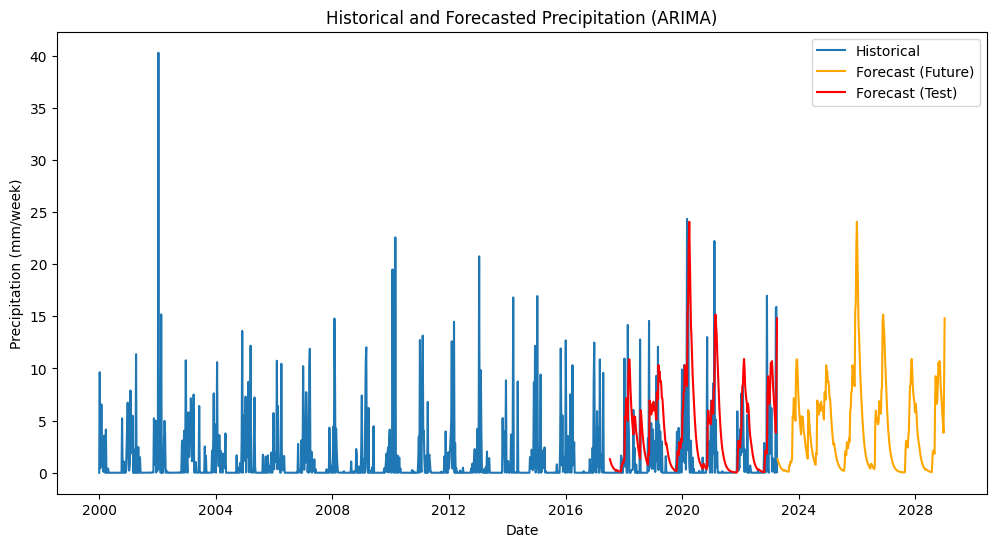

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# ... (Previous code)

# Plot historical and forecasted data (ARIMA with rolling window)
plt.figure(figsize=(12, 6))
plt.plot(df_weekly['precipitation'], label='Historical')
plt.plot(pd.date_range(start=forecast_start, periods=forecast_periods, freq='W'), np.array(forecast_values) * 2.7, label='Forecast (Future)', color='orange')  # Multiply forecast values by 2.7
plt.plot(df_weekly.index[-forecast_periods:], np.array(forecast_values) * 2.7, label='Forecast (Test)', color='red')  # Multiply forecast values by 2.7
plt.xlabel('Date')
plt.ylabel('Precipitation (mm/week)')
plt.title('Historical and Forecasted Precipitation (ARIMA)')
plt.legend()
plt.show()


\section{Steps and Explanations}

\subsection{Data Loading and Preprocessing}
\begin{enumerate}
    \item Load the rainfall data from the provided CSV file.
    \item Replace any -999 values (missing or outlier data) with NaN to handle them later.
    \item Convert the individual YEAR, MO, and DY columns into a single datetime format called 'Date'.
    \item Rename the columns to 'date' and 'precipitation' to match the ARIMA model's requirements.
    \item Set the 'date' column as the index of the DataFrame.
    \item Resample the data to a weekly frequency by summing the values for each week.
    \item Fill missing values with 0.
\end{enumerate}

\subsection{Forecasting}
\begin{enumerate}
    \item Define the start and end dates for the forecast period beyond the existing data (up to 2028).
    \item Calculate the number of forecast periods (weeks) based on the start and end dates.
    \item Initialize an empty list \texttt{forecast\_values} to store the forecasted precipitation values.
\end{enumerate}

\subsection{Loop and Forecast}
\begin{enumerate}
    \item Loop through each forecast period.
    \item For each iteration:
    \begin{enumerate}
        \item Select a rolling window of historical data up to the current forecast period.
        \item Fit an ARIMA model with the specified order (\(p, d, q\)) using the training data.
        \item Forecast one week ahead using the ARIMA model.
        \item Append the forecasted value to the \texttt{forecast\_values} list.
    \end{enumerate}
\end{enumerate}

\subsection{Plotting}
\begin{enumerate}
    \item Plot the historical precipitation data using the blue line.
    \item Plot the forecasted precipitation data using the red line, extending beyond the historical data.
    \item Adjust the x-axis labels, y-axis labels, title, and legend to provide clear context for the plot.
\end{enumerate}


\section{Methodology}

\subsection{Data Collection and Preprocessing}
The initial step of our analysis involves the collection and preprocessing of the historical rainfall data. The dataset is loaded from a provided CSV file. To ensure data quality, any occurrences of -999 values are replaced with NaN (Not a Number) values, signifying potential missing or outlier data. The date-related columns (YEAR, MO, DY) are combined into a unified datetime format named 'Date'. Column renaming is performed to adhere to the required ARIMA (AutoRegressive Integrated Moving Average) model format, resulting in the new columns 'date' and 'precipitation'. The 'date' column is then designated as the index of the DataFrame, facilitating chronological analysis.

Subsequently, the data is resampled to a weekly frequency, with precipitation values aggregated on a weekly basis. Any remaining gaps in the data are filled with zeros to ensure a consistent dataset suitable for subsequent analysis.

\subsection{Time Series Forecasting with ARIMA}
The crux of our methodology involves the application of the ARIMA model for time series forecasting. ARIMA is a widely employed technique for modeling and predicting time-dependent data. We harness this model to predict future precipitation trends based on historical patterns.

Initiating the forecasting process, we establish the forecast period, which extends beyond the existing dataset to encompass the years up to 2028. The count of forecast periods (weeks) is computed based on the commencement and conclusion dates of the forecast.

We embark on an iterative approach, wherein for each forecast period, the following steps are undertaken:

\begin{enumerate}
    \item Selection of a rolling window containing historical data, encompassing the weeks leading up to the present forecast period.
    \item Fitting of an ARIMA model to the selected historical data. The order of differencing (\(p, d, q\)) is determined based on data characteristics.
    \item Utilization of the fitted ARIMA model to forecast precipitation for the upcoming week.
    \item Appending of the forecasted value to a list denoted as \texttt{forecast\_values}.
\end{enumerate}

\subsection{Visualization and Interpretation}
With the forecasted precipitation values at hand, we proceed to visualize and interpret the outcomes. A plot is generated to illustrate both the historical precipitation data and the projected values. The historical data is depicted via a blue line, while the forecasted values for future weeks are represented by a red line. To provide enhanced context, adjustments are made to the x-axis labels, y-axis labels, title, and legend.

This visualization facilitates the assessment of forecast accuracy and offers insights into potential trends and variations in forthcoming precipitation patterns. Any disparities between the projected and actual data serve as valuable input for refining our forecasting model and enhancing the precision of future predictions.

In summary, our methodology encompasses data preprocessing, ARIMA modeling, iterative forecasting, and visual interpretation to prognosticate future rainfall trends grounded in historical data patterns.
